### **Importing Required Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### **Loading the data from CSV File**

In [0]:
data = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",names=["Frequency","Angle of attack","Chord length","Free-steam velocity","Displacement thickness","sound pressure"])

### **Inspecting data**

In [45]:
data

,Frequency,Angle of attack,Chord length,Free-steam velocity,Displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### **By looking at the above data:**
 1. Sound Pressure is the Target (which will be predicted after training)
 2. It is an estimation problem (continuous valued output)
 3. We have 5 Features 

### **Checking For Missing values**

In [46]:
data.isnull().values.any()

False

In [47]:
data.isnull().sum()

Frequency                 0
Angle of attack           0
Chord length              0
Free-steam velocity       0
Displacement thickness    0
sound pressure            0
dtype: int64

**No missing values found..** 🎉🎊


### **Normalizing Data to get values between 0 and 1**

In [0]:
data =(data - data.min())/(data.max()-data.min()) 

### **Data Visualization**

In [0]:
x1 = data['Frequency'].values
x2 = data['Displacement thickness'].values
x3 = data['Chord length'].values
x4 = data['Angle of attack'].values
x5 = data['Free-steam velocity'].values
y = data['sound pressure'].values

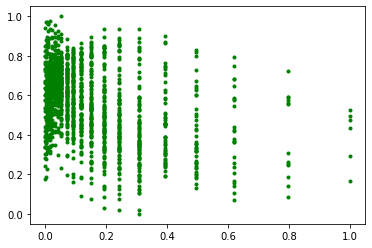

In [133]:
plt.plot(x1,y,'g.')

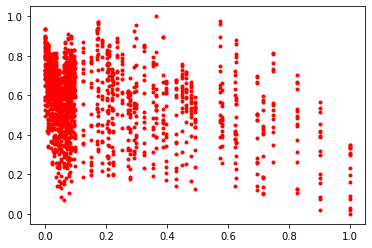

In [134]:
plt.plot(x2,y,'r.')

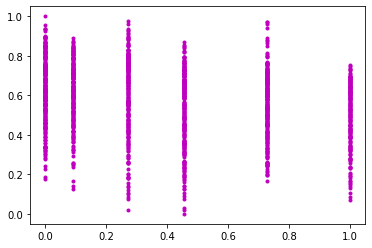

In [135]:
plt.plot(x3,y,'m.')

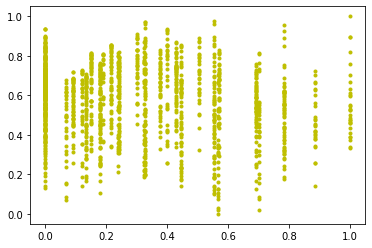

In [136]:
plt.plot(x4,y,'y.')

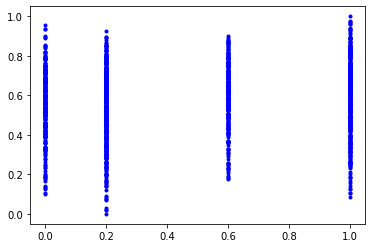

In [137]:
plt.plot(x5,y,'b.')

### Now Let's take a look at ALL the Features

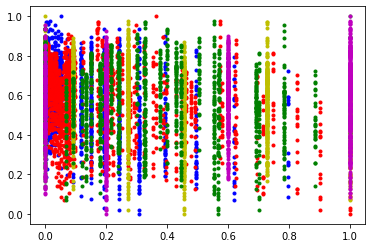

In [220]:
plt.plot(x1,y,'b.',x2,y,'r.',x3,y,'y.',x4,y,'g.',x5,y,'m.')

### **Feature Selection**



### **1.Using Pearson Correlation**

In [72]:
data.corr('pearson')['sound pressure']

Frequency                -0.390711
Angle of attack          -0.156108
Chord length             -0.236162
Free-steam velocity       0.125103
Displacement thickness   -0.312670
sound pressure            1.000000
Name: sound pressure, dtype: float64

**By doing the Pearson Correlation we can see that the features affecting the target are in the order:**
1. Frequency
2. Displacement thickness
3. Chord length 
4. Angle of attack 
5. Free-steam velocity

### **2.Using Heat Map**

Text(0.5, 1.0, 'Correlation Heatmap')

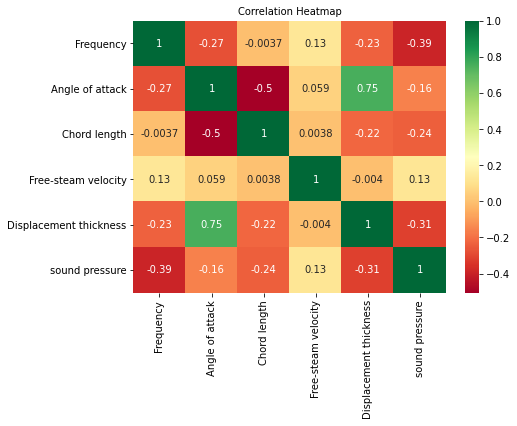

In [77]:
corr = data.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap', fontsize=10)

### **3.Using PairPlot to understand Features better**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


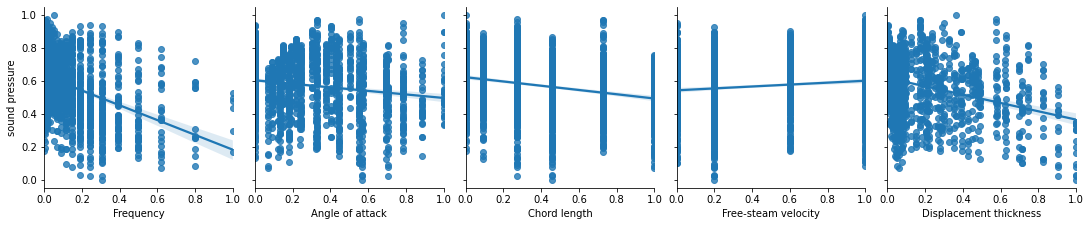

In [74]:
sns.pairplot(data=data, kind='reg', size = 3,
                  y_vars=['sound pressure'],
                  x_vars=['Frequency', 'Angle of attack', 'Chord length', 'Free-steam velocity', 'Displacement thickness'])

### **Model Selection**

By looking visualising the data and looking at the target which is continuous this problem can be solved using "Linear Regression"
1. Univariate Linear Regression
2. Multivariate Linear Regression(2 Features)
3. Multivariate Linear Regression(3 Features)
4. Multivariate Linear Regression(All Features)
5. Polynomial Linear Regression 


## **LINEAR REGRESSION**

## **1.Using Univariate**
-Selected Feature : Frequency

### Splitting Data using TrainTestSplit

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y, test_size=0.2)

Hypothesis Function

In [0]:
def h(a,x,b):
  return (a*x) + b

In [0]:
def error(a,x,b,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,x[i],b)-y[i], 2)
  
  return e/(2*m)

In [0]:
def step_gradient(a,x,b,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,x[i],b) - y[i]) * x[i]
    grad_b += (1/m) * (h(a,x[i],b) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)

  return a,b

In [0]:
def descend(init_a,x,init_b,y,learning_rate,iter):
  a = init_a
  b = init_b

  for i in range(iter):
    if i%1000==0:
      print(f"Error: {error(a,x,b,y)} | a: {a} | b: {b}")
    a,b = step_gradient(a,x,b,y,learning_rate)

  return a, b

In [0]:
a = 0
b = 0 
learning_rate = 0.01

### Plotting Before Training

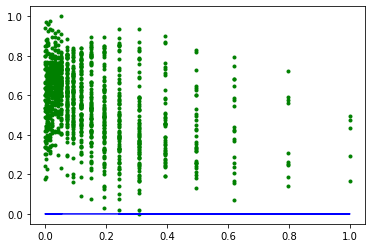

In [175]:
plt.plot(xtrain, ytrain, 'g.',
         xtrain, h(a, xtrain,b), 'b')

In [176]:
a, b = descend(a,xtrain,b,ytrain,learning_rate,10000)

Error: 0.17840638525669092 | a: 0 | b: 0
Error: 0.016376870795758953 | a: -0.035345149228849945 | b: 0.5720308451356787
Error: 0.015569617357656843 | a: -0.12408494780550837 | b: 0.5845759750334374
Error: 0.01507885943043426 | a: -0.19327773539135973 | b: 0.5943420615658352
Error: 0.014780510247742663 | a: -0.24722750477673094 | b: 0.6019567002600932
Error: 0.014599133177959035 | a: -0.2892922591265804 | b: 0.6078938508686119
Error: 0.014488867612132729 | a: -0.32209024100253053 | b: 0.6125230603115926
Error: 0.014421833256458657 | a: -0.34766289991285126 | b: 0.6161324651389235
Error: 0.014381080689626367 | a: -0.3676019585481372 | b: 0.6189467260549678
Error: 0.014356305756135638 | a: -0.38314848660591905 | b: 0.6211410115071292


### Plotting after training

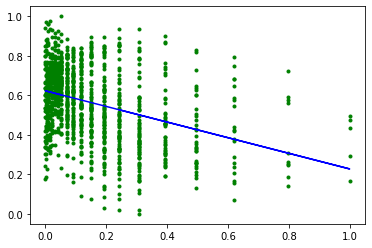

In [178]:
plt.plot(xtrain, ytrain, 'g.',
         xtrain, h(a, xtrain,b), 'b')


### Mean Squared Error

In [179]:
np.sqrt(error(a, xtrain,b,ytrain))

0.11975493390130945

In [180]:
np.sqrt(error(a, xtest,b,ytest))

0.1186039564756485

By Using Univariate 


*   mse = 0.11975493390130945



## **2.Using Multivariate**
-Selected Features : 

*   Frequency
*   Displacement thickness




In [0]:
x1_train, x1_test ,x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

In [0]:
def h(a,b,c,x1,x2):
  return (a*x1) + (b*x2) + c

In [0]:
def error(a,b,c, x1,x2,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,b,c,x1[i], x2[i])-y[i], 2)
  
  return e/(2*m)

In [0]:
def step_gradient(a,b,c, x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)

  return a,b,c

In [0]:
def descend(init_a,init_b,init_c, x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error(a,b,c, x1,x2,y),a,b,c))
    a,b,c = step_gradient(a,b,c, x1,x2,y,learning_rate)

  return a,b,c

In [0]:
a = 0
b = 0 
c = 0
learning_rate = 0.01
iters = 10000

### Plotting Before Training

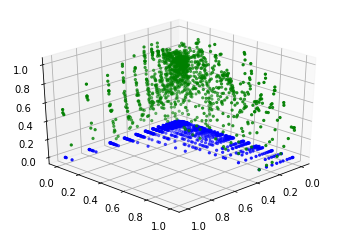

In [162]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x2_train, y_train, c='g', marker='.')
ax.scatter(x1_train, x2_train, h(a,b,c,x1_train,x2_train), c='b', marker='.')

In [167]:
a,b,c = descend(a,b,c, x1_train,x2_train,y_train,learning_rate,iters)

Error: 0.01131 | a: -0.47690 | b: -0.31460 | c: 0.69210
Error: 0.01129 | a: -0.49231 | b: -0.31998 | c: 0.69524
Error: 0.01127 | a: -0.50474 | b: -0.32419 | c: 0.69774
Error: 0.01126 | a: -0.51476 | b: -0.32750 | c: 0.69974
Error: 0.01125 | a: -0.52282 | b: -0.33012 | c: 0.70135
Error: 0.01124 | a: -0.52932 | b: -0.33221 | c: 0.70263
Error: 0.01124 | a: -0.53454 | b: -0.33387 | c: 0.70366
Error: 0.01124 | a: -0.53875 | b: -0.33519 | c: 0.70449
Error: 0.01124 | a: -0.54213 | b: -0.33626 | c: 0.70516
Error: 0.01124 | a: -0.54485 | b: -0.33710 | c: 0.70569


### Plotting After Training

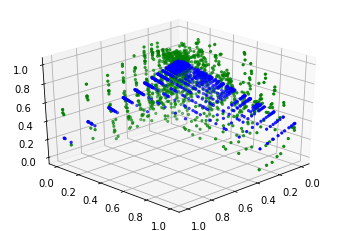

In [164]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x2_train, y_train, c='g', marker='.')
ax.scatter(x1_train, x2_train, h(a,b,c,x1_train,x2_train), c='b', marker='.')

In [165]:
np.sqrt(error(a,b,c, x1_train,x2_train,y_train))

0.10636639017144718

In [166]:
np.sqrt(error(a,b,c, x1_test,x2_test,y_test))

0.10987271009188995

## **3.Using Polynomial Regression**

In [0]:
x1_train, x1_test ,x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

In [0]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * np.power(x2, 2) + c

In [0]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i], x2[i]) - y[i]), 2)
    
    return e/(2*m) 

In [0]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [0]:
def descend(init_a,init_b,init_c, x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error(a,b,c, x1,x2,y),a,b,c))
    a,b,c = step_gradient(a,b,c, x1,x2,y,learning_rate)

  return a,b,c

In [0]:
a = 0
b = 0 
c = 0
learning_rate = 0.01
iters = 10000

In [190]:
a,b,c = descend(a,b,c, x1_train,x2_train,y_train,learning_rate,iters)

Error: 0.01182 | a: -0.47705 | b: -0.40266 | c: 0.66729
Error: 0.01181 | a: -0.49057 | b: -0.41181 | c: 0.67000
Error: 0.01181 | a: -0.50136 | b: -0.41898 | c: 0.67215
Error: 0.01181 | a: -0.50996 | b: -0.42461 | c: 0.67386
Error: 0.01181 | a: -0.51681 | b: -0.42904 | c: 0.67521
Error: 0.01181 | a: -0.52226 | b: -0.43252 | c: 0.67629
Error: 0.01181 | a: -0.52661 | b: -0.43527 | c: 0.67714
Error: 0.01181 | a: -0.53006 | b: -0.43744 | c: 0.67782
Error: 0.01181 | a: -0.53281 | b: -0.43916 | c: 0.67836
Error: 0.01181 | a: -0.53500 | b: -0.44052 | c: 0.67878


In [191]:
np.sqrt(error(a,b,c, x1_train,x2_train,y_train))

0.10870071369164795

In [192]:
np.sqrt(error(a,b,c, x1_test,x2_test,y_test))

0.10883056580320422

## **4.Using Multivariate(3 Features)**
-Selected Features : 

*   Frequency
*   Displacement thickness
*   Chord length


In [0]:
x1_train, x1_test ,x2_train, x2_test, x3_train, x3_test, y_train, y_test = train_test_split(x1,x2,x3,y,test_size=0.2)

In [0]:
def h(a,b,c,d,x1,x2,x3):
  return (a*x1) + (b*x2) + (c*x3) + d

In [0]:
def error(a,b,c,d, x1,x2,x3,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,b,c,d,x1[i], x2[i], x3[i])-y[i], 2)
  
  return e/(2*m)

In [0]:
def step_gradient(a,b,c,d, x1,x2,x3,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x3[i]
    grad_d += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  d = d - (grad_d * learning_rate)

  return a,b,c,d

In [0]:
def descend(init_a,init_b,init_c,init_d, x1,x2,x3,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c
  d = init_d


  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f | d: %.5f" %(error(a,b,c,d,x1,x2,x3,y),a,b,c,d))
    a,b,c,d = step_gradient(a,b,c,d, x1,x2,x3,y,learning_rate)

  return a,b,c,d

In [0]:
a = 0
b = 0 
c = 0
d = 0
learning_rate = 0.01
iters = 10000

In [199]:
a,b,c,d = descend(a,b,c,d, x1_train,x2_train,x3_train,y_train,learning_rate,iters)

Error: 0.18183 | a: 0.00000 | b: 0.00000 | c: 0.00000 | d: 0.00000
Error: 0.01613 | a: -0.03918 | b: -0.01426 | c: 0.00792 | d: 0.57124
Error: 0.01334 | a: -0.13064 | b: -0.10275 | c: -0.07571 | d: 0.63627
Error: 0.01186 | a: -0.21034 | b: -0.17279 | c: -0.11645 | d: 0.67762
Error: 0.01099 | a: -0.27825 | b: -0.22574 | c: -0.13880 | d: 0.70623
Error: 0.01044 | a: -0.33528 | b: -0.26524 | c: -0.15246 | d: 0.72713
Error: 0.01009 | a: -0.38271 | b: -0.29474 | c: -0.16154 | d: 0.74289
Error: 0.00987 | a: -0.42187 | b: -0.31691 | c: -0.16792 | d: 0.75503
Error: 0.00973 | a: -0.45405 | b: -0.33373 | c: -0.17258 | d: 0.76449
Error: 0.00963 | a: -0.48039 | b: -0.34661 | c: -0.17607 | d: 0.77193


In [200]:
np.sqrt(error(a,b,c,d,x1_train,x2_train,x3_train,y_train))

0.09784257353048685

In [201]:
np.sqrt(error(a,b,c,d, x1_test,x2_test,x3_test,y_test))

0.09707680680519302

## **5.Using Multivariate(All Features)**
-Selected Features : 

*   Frequency
*   Displacement thickness
*   Chord length
*   Angle of attack
*   Free-steam velocity


In [0]:
x1_train, x1_test ,x2_train, x2_test, x3_train, x3_test, x4_train, x4_test, x5_train, x5_test, y_train, y_test = train_test_split(x1,x2,x3,x4,x5,y,test_size=0.2)

In [0]:
def h(a,b,c,d,e,f,x1,x2,x3,x4,x5):
  return (a*x1) + (b*x2) + (c*x3) + (d*x4) + (e*x5) + f

In [0]:
def error(a,b,c,d,e,f, x1,x2,x3,x4,x5,y):
  m = len(y)
  error = 0
  for i in range(m):
    error += np.power((h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i])-y[i]), 2)
  
  return error/(2*m)

In [0]:
def step_gradient(a,b,c,d,e,f,x1,x2,x3,x4,x5,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  grad_e = 0
  grad_f = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x3[i]
    grad_d += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x4[i]
    grad_e += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x5[i]
    grad_f += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  d = d - (grad_d * learning_rate)
  e = e - (grad_e * learning_rate)
  f = f - (grad_f * learning_rate)

  return a,b,c,d,e,f

In [0]:
def descend(init_a,init_b,init_c,init_d,init_e,init_f,x1,x2,x3,x4,x5,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c
  d = init_d
  e = init_e
  f = init_f


  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f | d: %.5f | e: %.5f | f: %.5f" %(error(a,b,c,d,e,f,x1,x2,x3,x4,x5,y),a,b,c,d,e,f))
    a,b,c,d,e,f  = step_gradient(a,b,c,d,e,f, x1,x2,x3,x4,x5,y,learning_rate)

  return a,b,c,d,e,f

In [0]:
a = 0
b = 0 
c = 0
d = 0
e = 0
f = 0
learning_rate = 0.01
iters = 10000

In [214]:
a,b,c,d,e,f = descend(a,b,c,d,e,f,x1_train,x2_train,x3_train,x4_train,x5_train,y_train,learning_rate,iters)

Error: 0.17781 | a: 0.00000 | b: 0.00000 | c: 0.00000 | d: 0.00000 | e: 0.00000 | f: 0.00000
Error: 0.01628 | a: -0.04867 | b: -0.05528 | c: 0.01535 | d: 0.04963 | e: 0.11180 | f: 0.49783
Error: 0.01295 | a: -0.14065 | b: -0.13868 | c: -0.06468 | d: 0.00048 | e: 0.08975 | f: 0.58771
Error: 0.01120 | a: -0.22427 | b: -0.19308 | c: -0.11551 | d: -0.03660 | e: 0.08404 | f: 0.64593
Error: 0.01018 | a: -0.29777 | b: -0.22801 | c: -0.14895 | d: -0.06467 | e: 0.08372 | f: 0.68593
Error: 0.00955 | a: -0.36093 | b: -0.25022 | c: -0.17178 | d: -0.08664 | e: 0.08524 | f: 0.71465
Error: 0.00914 | a: -0.41440 | b: -0.26411 | c: -0.18797 | d: -0.10451 | e: 0.08733 | f: 0.73604
Error: 0.00886 | a: -0.45926 | b: -0.27251 | c: -0.19991 | d: -0.11952 | e: 0.08949 | f: 0.75244
Error: 0.00868 | a: -0.49664 | b: -0.27723 | c: -0.20904 | d: -0.13246 | e: 0.09152 | f: 0.76534
Error: 0.00855 | a: -0.52768 | b: -0.27946 | c: -0.21626 | d: -0.14380 | e: 0.09334 | f: 0.77569


In [215]:
np.sqrt(error(a,b,c,d,e,f,x1_train,x2_train,x3_train,x4_train,x5_train,y_train))

0.09201099147517425

In [216]:
np.sqrt(error(a,b,c,d,e,f, x1_test,x2_test,x3_test,x4_test, x5_test,y_test))

0.08925035257931557